# Image Filtering

Images filters are in spatial domain and they are mathematical operations over a grid of numbers aka Matrices. Depending on the configuration of the Filter matrix, different effects can be obtained such as **smoothing, sharpening, edges, etc**.

### 1-Dimension Signal

Such as sound, stock market value, etc.

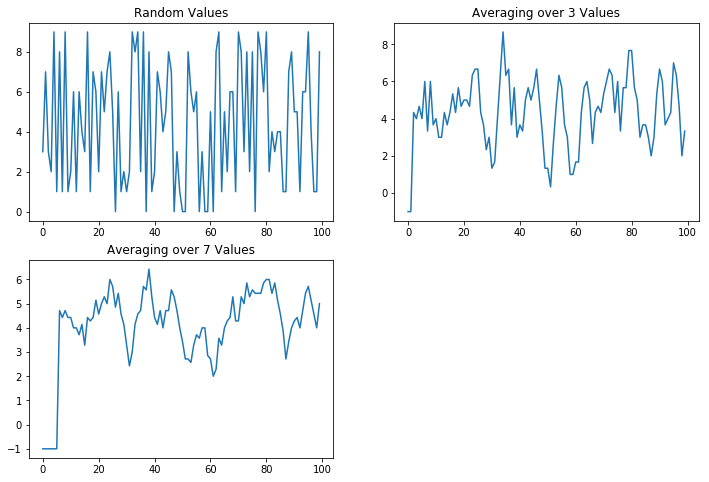

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def applyFilter(signal, f):
    out = np.ones(signal.shape)*-1
    for i in range(len(f)-1, len(signal)):
        sum = 0
        for j in range(len(f)):
            sum += signal[i-j] * f[j]
        out[i] = sum/len(f)
    
    return out

x = np.arange(0, 100, 1)
y = np.random.randint(0, high=10, size=100)
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.plot(x, y)
plt.title('Random Values')

# Apply filter over random values
filter = [1, 1, 1] # Averaging over 3 values
y_filtered = applyFilter(y, filter)
plt.subplot(222)
plt.plot(x, y_filtered)
plt.title('Averaging over 3 Values')

filter = [1, 1, 1, 1, 1, 1, 1] # Averaging over 7 values
y_filtered = applyFilter(y, filter)
plt.subplot(223)
plt.plot(x, y_filtered)
plt.title('Averaging over 7 Values')
plt.show()


## 2-Dimensional Signal

Such as Images.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

def applyFilter2(signal, f):
    out = np.ones(signal.shape)*-1
    for i in range(np.floor(f.shape[0]/2), signal.shape[0]):
        for j in range(np.floor(f.shape[1]/2), signal.shape[1]):
            sum = 0
            for m in range(f.shape[0]):
                for n in range(f.shape[1]):
                    sum += signal[i, j] * f[m, n]
            out[i] = sum/len(f)
    
    return out


## Frequency Domain

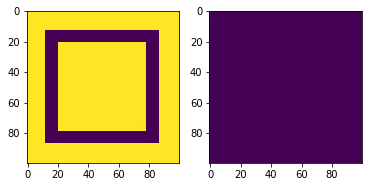

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

def dft(inreal, inimag):
    n = len(inreal)
    outreal = np.ones(n)*-1
    outimag = np.ones(n)*-1
    
    for k in range(0, n):
        sumreal = 0
        sumimag = 0
        for t in range(0, n):
            angle = 2 * np.pi * t * k / n
            sumreal += inreal[t] * np.cos(angle) * inimag[t] * np.sin(angle)
            sumimag += -inreal[t] * np.sin(angle) * inimag[t] * np.cos(angle)
        
        outreal[k] = sumreal
        outimag[k] = sumimag
        
    return (outreal, outimag)

img = cv.imread('square.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.figure()

plt.subplot(121)
plt.imshow(img)

plt.subplot(122)
#freq = dft2(img, 3)
plt.imshow(freq)

plt.show()
